In [2]:
import tensorflow
from tensorflow.keras import backend
import pandas as pd
#import eli5
import pickle
#import shap
from lime import lime_text
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
% matplotlib inline
#from pdpbox.pdp import pdp_isolate, pdp_plot,pdp_interact_plot
#from pdpbox import info_plots, get_dataset

{'.net': 0,
 'android': 1,
 'asp.net': 2,
 'c': 3,
 'c#': 4,
 'c++': 5,
 'css': 6,
 'html': 7,
 'ios': 8,
 'iphone': 9,
 'java': 10,
 'javascript': 11,
 'jquery': 12,
 'mysql': 13,
 'objective-c': 14,
 'other': 15,
 'php': 16,
 'python': 17,
 'ruby-on-rails': 18,
 'sql': 19}

In [3]:
with open("feature_importance.txt", "rb") as fp:   # Unpickling
    feature_names = pickle.load(fp)

In [4]:
model_rf = pickle.load(open('RF_model', 'rb'))
#result = loaded_model.score(X_test, Y_test)

/usr/local/lib64/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.19.1 when using version 0.22.2.post1. This might lead to

In [5]:
df_train=pd.read_csv("dataframe_train.csv",index_col=0)
df_test=pd.read_csv("dataframe_test.csv",index_col=0)

In [6]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,tag_javascript,tag_jquery,tag_mysql,tag_objective-c,tag_other,tag_php,tag_python,tag_ruby-on-rails,tag_sql,maintag
0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,16
1,0.0,0.000000,0.0,0.0,0.088881,0.075157,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,11
2,0.0,0.155549,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,15
3,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,15
4,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,11


In [7]:
feature_names

[(335, ['php', 0.025541244366672034]),
 (15, ['android', 0.0251754016533942]),
 (228, ['java', 0.022328838925643763]),
 (364, ['python', 0.01971621912245411]),
 (230, ['javascript', 0.01366245439274515]),
 (232, ['jqueri', 0.010289439672291208]),
 (64, ['code', 0.010217482635865964]),
 (479, ['var', 0.009160744396328744]),
 (159, ['function', 0.008936531845391407]),
 (300, ['mysql', 0.008737000288841444]),
 (344, ['pre', 0.008208469608507999]),
 (471, ['use', 0.008070219465532096]),
 (67, ['code pre', 0.007791319587412785]),
 (345, ['pre code', 0.007690495537658561]),
 (221, ['int', 0.007207111389416924]),
 (483, ['void', 0.006441164929401641]),
 (304, ['new', 0.0063518036176710355]),
 (168, ['gt', 0.006224440426191334]),
 (162, ['get', 0.005966408503363993]),
 (426, ['std', 0.005958853297446473]),
 (358, ['public', 0.005865635118724039]),
 (60, ['class', 0.005486395369503767]),
 (264, ['lt', 0.005386504600267834]),
 (429, ['string', 0.005255221452539927]),
 (250, ['like', 0.0050894662

In [8]:
label_col = [col for col in df_test if col.startswith('tag_')]
label_col

['tag_.net',
 'tag_android',
 'tag_asp.net',
 'tag_c',
 'tag_c#',
 'tag_c++',
 'tag_css',
 'tag_html',
 'tag_ios',
 'tag_iphone',
 'tag_java',
 'tag_javascript',
 'tag_jquery',
 'tag_mysql',
 'tag_objective-c',
 'tag_other',
 'tag_php',
 'tag_python',
 'tag_ruby-on-rails',
 'tag_sql']

In [9]:
train_features=df_train.drop(label_col+['maintag'],axis=1)
y_train=df_train['maintag']
y_train_one_hot=df_train[label_col]
test_features=df_test.drop(label_col+['maintag'],axis=1)
y_test=df_test['maintag']
y_test_one_hot=df_test[label_col]

In [10]:
class_names = [y_train.unique()]
print(class_names)
print(type(class_names))
print(type(class_names[0]))
xyz = list(class_names[0])
print(xyz)
xyz = list(map(str,xyz))
print(xyz)
print(','.join(xyz))

[array([16, 11, 15,  4, 12,  1,  3, 10, 19, 17, 13,  5,  8,  7,  0, 18,  6,
       14,  2,  9])]
<class 'list'>
<class 'numpy.ndarray'>
[16, 11, 15, 4, 12, 1, 3, 10, 19, 17, 13, 5, 8, 7, 0, 18, 6, 14, 2, 9]
['16', '11', '15', '4', '12', '1', '3', '10', '19', '17', '13', '5', '8', '7', '0', '18', '6', '14', '2', '9']
16,11,15,4,12,1,3,10,19,17,13,5,8,7,0,18,6,14,2,9


# Visual representation of feature importance

In [11]:
eli5.show_weights(model_rf)

/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Weight,Feature
0.0255 ± 0.0144,x335
0.0252 ± 0.0115,x15
0.0223 ± 0.0119,x228
0.0197 ± 0.0105,x364
0.0137 ± 0.0101,x230
0.0103 ± 0.0067,x232
0.0102 ± 0.0025,x64
0.0092 ± 0.0073,x479
0.0089 ± 0.0050,x159
0.0087 ± 0.0042,x300


In [12]:
eli5.explain_weights_df(model_rf)

,feature,weight,std
0,x335,0.025541,0.007193
1,x15,0.025175,0.005734
2,x228,0.022329,0.005928
3,x364,0.019716,0.005269
4,x230,0.013662,0.005073
...,...,...,...
498,x285,0.000155,0.000083
499,x458,0.000151,0.000085
500,x459,0.000146,0.000103
501,x179,0.000144,0.000091


In [13]:
eli5.explain_prediction_df(model_rf,train_features.iloc[[0]],top_targets=2)

/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


,target,feature,weight,value
0,16,x335,0.220436,0.078074
1,16,x278,0.180808,0.105783
2,16,x122,0.151977,0.047941
3,16,<BIAS>,0.071675,1.000000
4,16,x28,0.049389,0.038499
...,...,...,...,...
937,15,x66,-0.016974,0.062327
938,15,x28,-0.028103,0.038499
939,15,x122,-0.041181,0.047941
940,15,x278,-0.067979,0.105783


In [14]:
# Making a dataframe with information regarding feature importance given by the model for all the test features to get their target.
df_target=pd.DataFrame()
for i in range(500):
    fea_imp=eli5.explain_prediction_df(model_rf,test_features.iloc[[i]],top_targets=1)
    df_target=df_target.append(fea_imp)

/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/l

/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/l

/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/l

/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/l

/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/l

/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/l

/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/l

/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/l

/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/l

/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/l

/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/l

/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/l

/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/l

/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/l

/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/usr/local/l

In [15]:
df_17=df_target[df_target['target']==17]

In [16]:
df_17_mean=df_17.groupby(['feature'])[['weight']].mean().reset_index().sort_values(by=['weight'],ascending=False)
df_17_mean

,feature,weight
296,x364,0.344661
6,x102,0.049938
0,<BIAS>,0.048944
122,x207,0.042416
278,x348,0.028400
...,...,...
322,x388,-0.002944
99,x187,-0.003015
242,x315,-0.003067
128,x212,-0.003838


In [17]:
dict={}
for i in range(500):
    dict.update( {'x'+str(feature_names[i][0]):feature_names[i][1][0]} )

dict

{'x335': 'php',
 'x15': 'android',
 'x228': 'java',
 'x364': 'python',
 'x230': 'javascript',
 'x232': 'jqueri',
 'x64': 'code',
 'x479': 'var',
 'x159': 'function',
 'x300': 'mysql',
 'x344': 'pre',
 'x471': 'use',
 'x67': 'code pre',
 'x345': 'pre code',
 'x221': 'int',
 'x483': 'void',
 'x304': 'new',
 'x168': 'gt',
 'x162': 'get',
 'x426': 'std',
 'x358': 'public',
 'x60': 'class',
 'x264': 'lt',
 'x429': 'string',
 'x250': 'like',
 'x484': 'want',
 'x491': 'work',
 'x122': 'echo',
 'x233': 'js',
 'x460': 'tri',
 'x399': 'self',
 'x224': 'io',
 'x23': 'app',
 'x102': 'def',
 'x198': 'id',
 'x450': 'thank',
 'x485': 'way',
 'x144': 'file',
 'x493': 'would',
 'x303': 'net',
 'x128': 'end',
 'x302': 'need',
 'x382': 'return',
 'x314': 'one',
 'x28': 'array',
 'x482': 'view',
 'x349': 'println',
 'x92': 'creat',
 'x93': 'css',
 'x398': 'select',
 'x312': 'object',
 'x439': 'tabl',
 'x96': 'data',
 'x130': 'error',
 'x473': 'user',
 'x478': 'valu',
 'x404': 'set',
 'x296': 'method',
 'x

In [18]:
df_17_mean['feature']=df_17_mean['feature'].map(dict) 

In [19]:
df_17_mean

,feature,weight
296,python,0.344661
6,def,0.049938
0,NaN,0.048944
122,import,0.042416
278,print,0.028400
...,...,...
322,save,-0.002944
99,host,-0.003015
242,open,-0.003067
128,init,-0.003838


In [20]:
df_17_mean.loc[df_17_mean['feature'].isnull()]

,feature,weight
0,NaN,0.048944
447,NaN,0.001918
449,NaN,0.000014
448,NaN,-0.000050


In [21]:
df_17_mean.at[0, 'feature']='bias'
df_17_mean.at[449,'feature']='ques_score_good'
df_17_mean.at[448,'feature']='ques_score_medium'
df_17_mean.at[447,'feature']='ques_score_bad'

In [22]:
df_17_dict=df_17_mean.set_index('feature').T.to_dict('int')

In [23]:
df_17_dict['weight']

{'python': 0.34466094627806254,
 'def': 0.04993787341691658,
 'bias': 0.048943999999999994,
 'import': 0.04241607850211331,
 'print': 0.028400430240317485,
 'py': 0.01965890668095259,
 'code pre': 0.005869949830111948,
 'self': 0.005098680264367155,
 'end': 0.004789296867234772,
 'php': 0.004050965249426454,
 'java': 0.004034709210907166,
 'pre code': 0.003765211062312439,
 'respons': 0.003417568805593787,
 'var': 0.0029292115967340803,
 'append': 0.002544944563787306,
 'void': 0.0025350718793357677,
 'new': 0.002492552612422043,
 'public': 0.0021775692891403287,
 'ques_score_bad': 0.001917564978073962,
 'app': 0.0016619867467935264,
 'javascript': 0.0016479725968733684,
 'control': 0.0016284867546537568,
 'chang': 0.0015774889850784122,
 'index': 0.001572304305927152,
 'href': 0.0015463739174971832,
 'code': 0.0014441089358762404,
 'modul': 0.001441996314526744,
 'tabl': 0.0014302578059606557,
 'pre': 0.0014262592207082772,
 'request': 0.0014235534208643262,
 'name': 0.001401752706917

In [25]:
with open("df_17_dict.txt", "wb") as fp:   # Pickling
    pickle.dump(df_17_dict['weight'],fp)

In [3]:
with open("df_17_dict.txt", "rb") as fp:   # Unpickling
    dict_17 = pickle.load(fp)

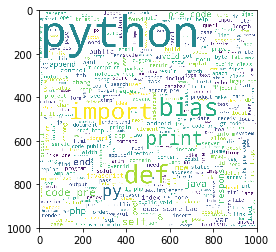

In [8]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=500,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict_17)
plt.imshow(wc)

/usr/local/lib64/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


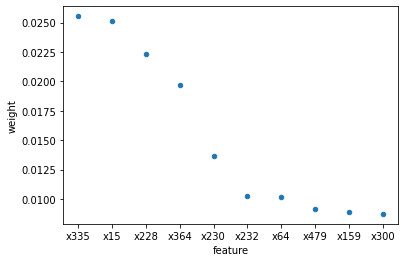

In [24]:
feature_imp=(eli5.explain_weights_df(model_rf)).head(10)
feature_imp.plot(x ='feature', y='weight', kind = 'scatter')
plt.show()

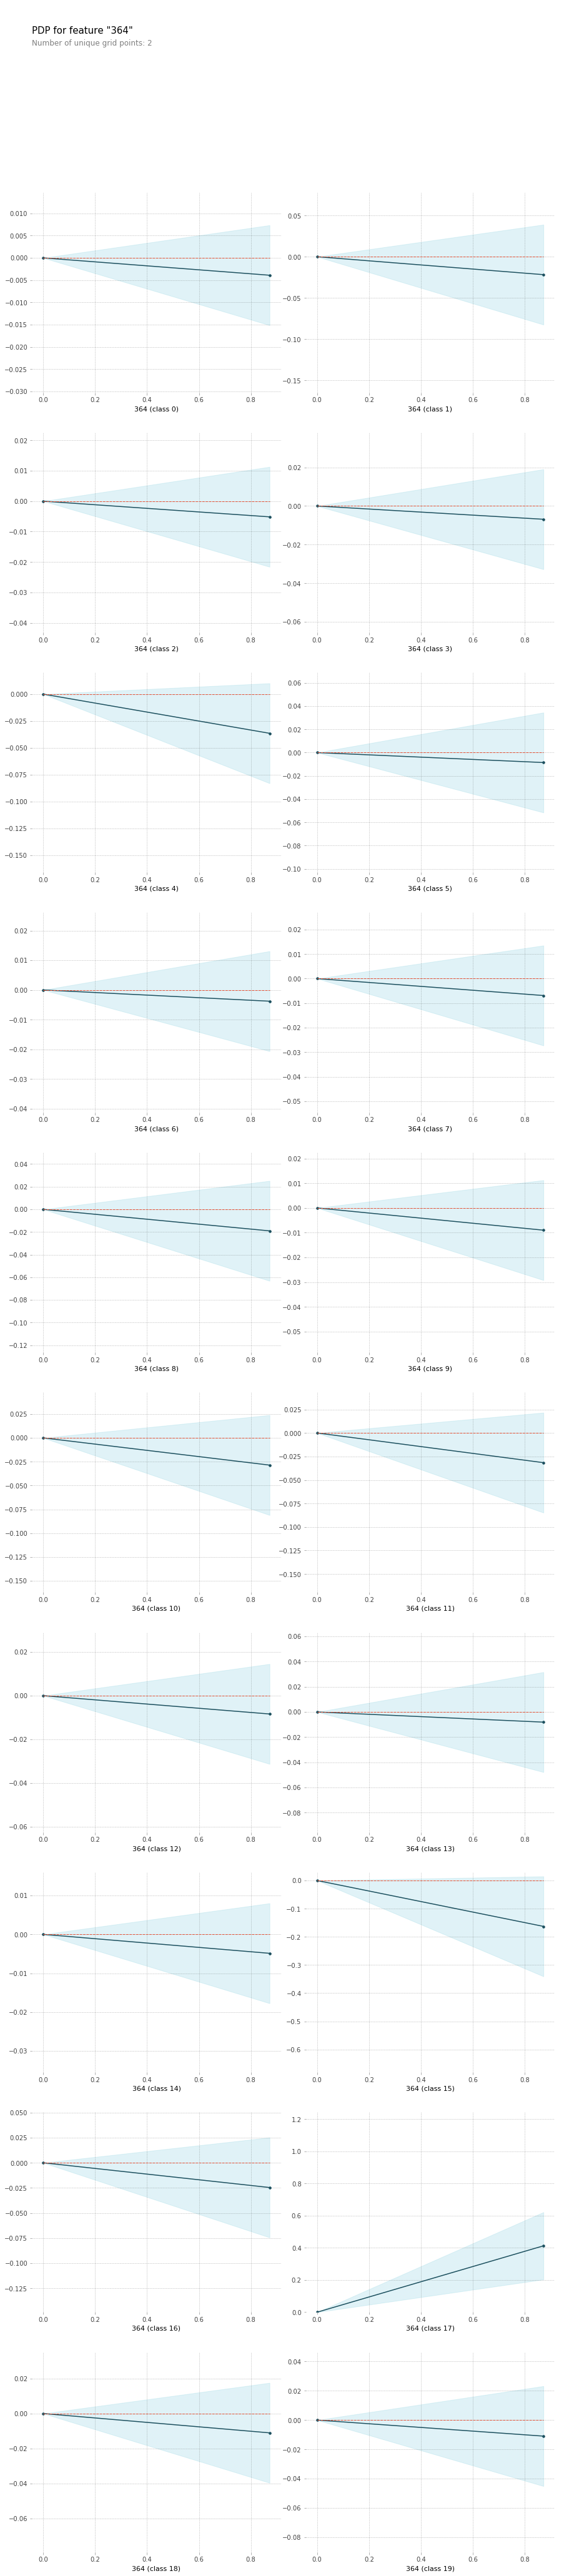

In [11]:
feature = '364'
isolated = pdp_isolate(
 model=model_rf,
 dataset=test_features,
 model_features=[str(i) for i in range(503)],
 feature=feature
)
pdp_plot(isolated, feature_name=feature);

In [ ]:
for i in range(train_features.shape[0]):


    aux1 = eli5.sklearn.explain_prediction.explain_prediction_tree_classifier(model_rf,train_features[i], top=15)
    aux1 = eli5.format_as_dataframe(aux1)

    if 'aux_total'  in locals() and 'aux_total' in  globals():
        aux_total = concat_average_dfs(aux1,aux_total)
    else:
        aux_total = aux1

In [ ]:
data_for_prediction = test_features[test_features==97]
shap.initjs()
explainer = shap.TreeExplainer(model_rf)
shap_values = explainer.shap_values(data_for_prediction)
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)

In [ ]:
info_plots.target_plot(df_train.as_matrix(), feature=220, feature_name=220, target=y_train_one_hot.as_matrix(), num_grid_points=10, grid_type='percentile', percentile_range=None, grid_range=None, cust_grid_points=None, show_percentile=False, show_outliers=False, endpoint=True, figsize=None, ncols=2, plot_params=None)

In [ ]:
c = make_pipeline(tfidf_text, model_2)

In [ ]:
from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(class_names=class_names)
idx = 20
exp = explainer.explain_instance(test_features.iloc[idx], c.predict_proba, num_features=4, labels=[0, 2])
print('Document id: %d' % idx)
print('Predicted class =', class_names[nb.predict(test_features[idx]).reshape(1,-1)[0,0]])
print('True class: %s' % class_names[y_test[idx]])